**IMPORTING NECESSARY PACKAGES**

In [1]:
from scipy.spatial import distance
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from math import sqrt

In [2]:
import math

**IMPORTING TRAINED DATASET**

In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Copy of msc_training_dataset.csv')


In [4]:
df

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,1,2,1,1,0,0,1,0,0,0,4825
2996,1,1,2,3,0,1,1,0,0,1,1,6755
2997,2,2,1,2,0,0,1,1,1,0,0,7565
2998,4,1,1,2,1,1,1,0,0,0,1,9135


In [5]:
trained_data = pd.DataFrame(df)

In [6]:
trained_data


,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,1,2,1,1,0,0,1,0,0,0,4825
2996,1,1,2,3,0,1,1,0,0,1,1,6755
2997,2,2,1,2,0,0,1,1,1,0,0,7565
2998,4,1,1,2,1,1,1,0,0,0,1,9135


**IMPORTING TEST DATASET**

In [7]:
test_data = pd.DataFrame(pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Copy of msc_testing_dataset.csv'))

In [8]:
test_data

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178
...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088
995,5,1,2,3,1,1,0,0,0,0,0,9788
996,3,2,2,1,0,1,1,1,0,1,0,9388
997,3,2,1,1,1,0,0,1,1,0,0,8528


**CHECKING INFORMATION OF TEST AND TRAINED DATA **

In [9]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


In [10]:
trained_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [11]:
trained_data.head(20)


,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
5,5,1,2,1,0,0,1,0,1,0,0,8995
6,3,1,1,3,1,0,0,1,0,0,0,6805
7,1,1,1,1,0,0,0,1,0,1,1,4935
8,5,1,1,2,0,0,0,1,1,0,0,9895
9,3,1,1,2,0,0,0,0,1,0,0,6365


**BASIC STATISTICS ON TRAINED DATA TO PROVIDE MORE UNDERSTANDING OF THE DATA**

In [12]:
#trained_data.describe().transpose().round()

from pandas.core.internals import concat
BasicStats = pd.concat([trained_data.describe().transpose(),trained_data.median()], axis = 1)
BasicStats.rename(columns={0: "Median"}, inplace=True)
BasicStats

,count,mean,std,min,25%,50%,75%,max,Median
room,3000.0,2.990000,1.424281,1.0,2.0,3.0,4.0,5.0,3.0
bathroom,3000.0,1.489000,0.499962,1.0,1.0,1.0,2.0,2.0,1.0
kitchen,3000.0,1.522000,0.499599,1.0,1.0,2.0,2.0,2.0,2.0
french_door,3000.0,1.998333,0.813153,1.0,1.0,2.0,3.0,3.0,2.0
backyard,3000.0,0.490333,0.499990,0.0,0.0,0.0,1.0,1.0,0.0
furnished,3000.0,0.488667,0.499955,0.0,0.0,0.0,1.0,1.0,0.0
green_paint,3000.0,0.485000,0.499858,0.0,0.0,0.0,1.0,1.0,0.0
solar_power,3000.0,0.495667,0.500065,0.0,0.0,0.0,1.0,1.0,0.0
woodfloor,3000.0,0.512333,0.499931,0.0,0.0,1.0,1.0,1.0,1.0
qlm_security,3000.0,0.480667,0.499709,0.0,0.0,0.0,1.0,1.0,0.0


In [13]:
trained_data.median()

room               3.0
bathroom           1.0
kitchen            2.0
french_door        2.0
backyard           0.0
furnished          0.0
green_paint        0.0
solar_power        0.0
woodfloor          1.0
qlm_security       0.0
club_access        0.0
price           8615.0
dtype: float64

**DATA VISUALIZATION WITH PAIR PLOTS**

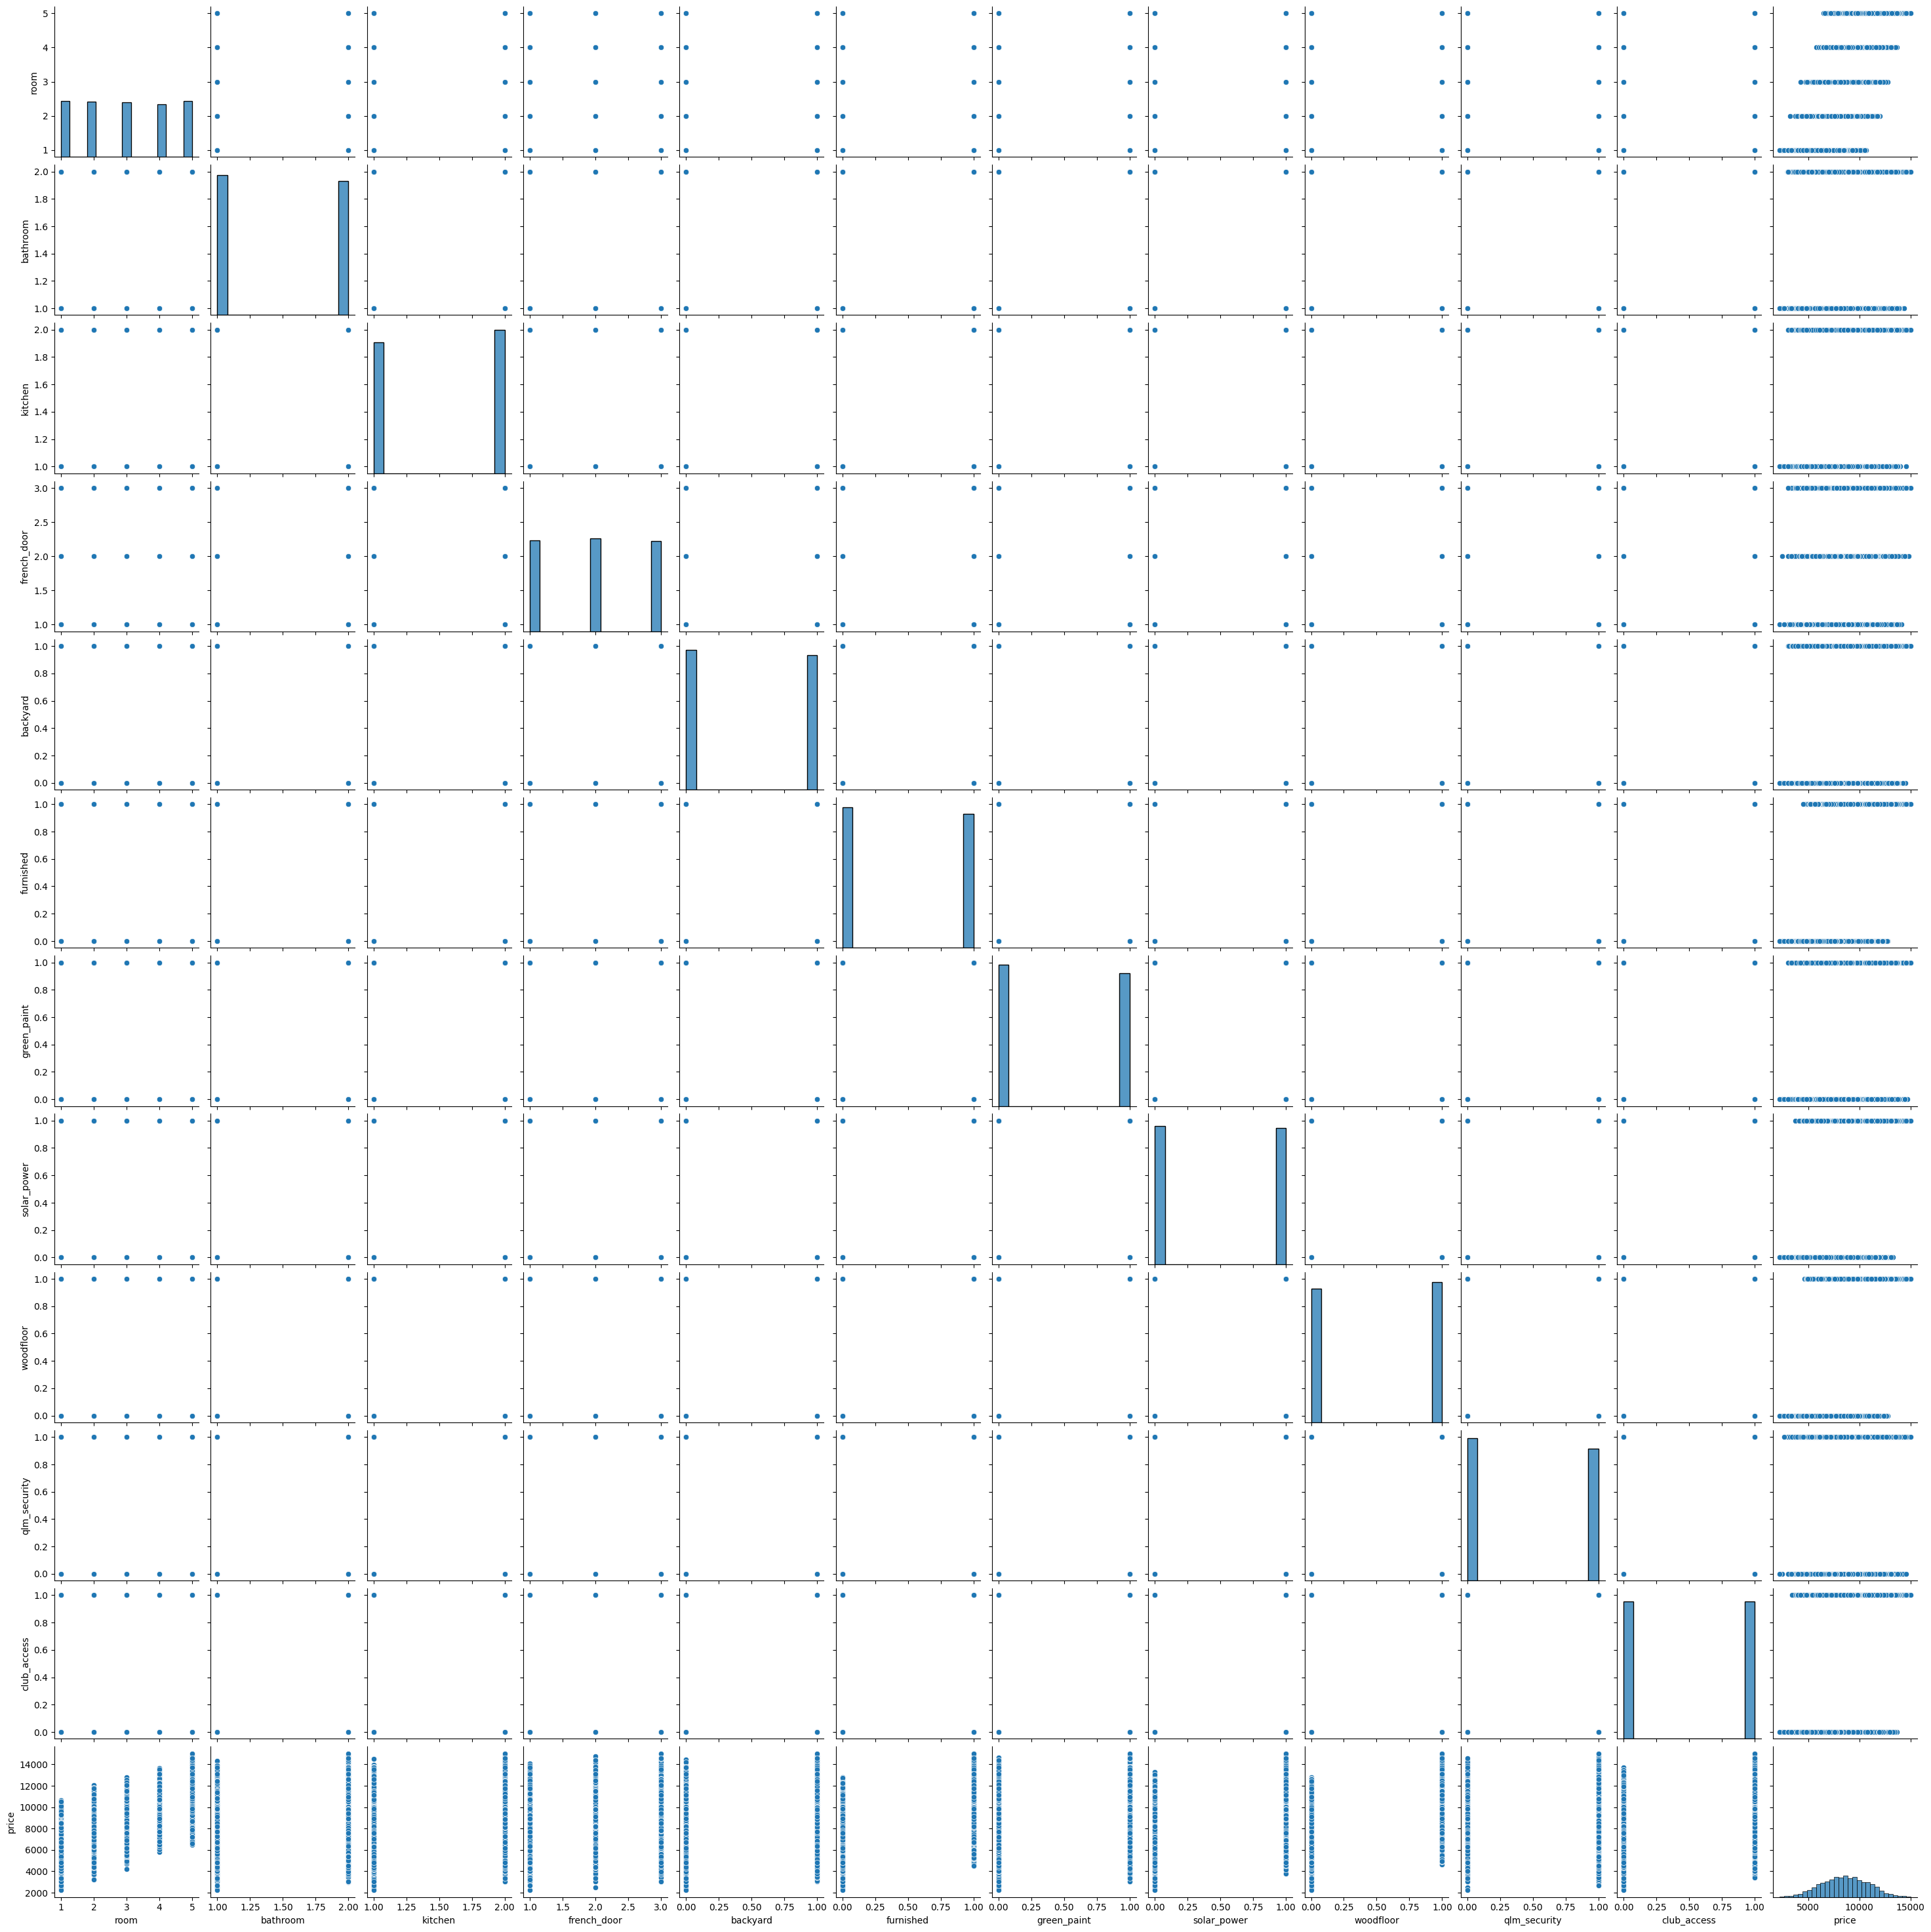

In [14]:
sns.pairplot(trained_data)

**CORRELATION ANALYSIS BETWEEN ALL THE FEATURES**

<Axes: >

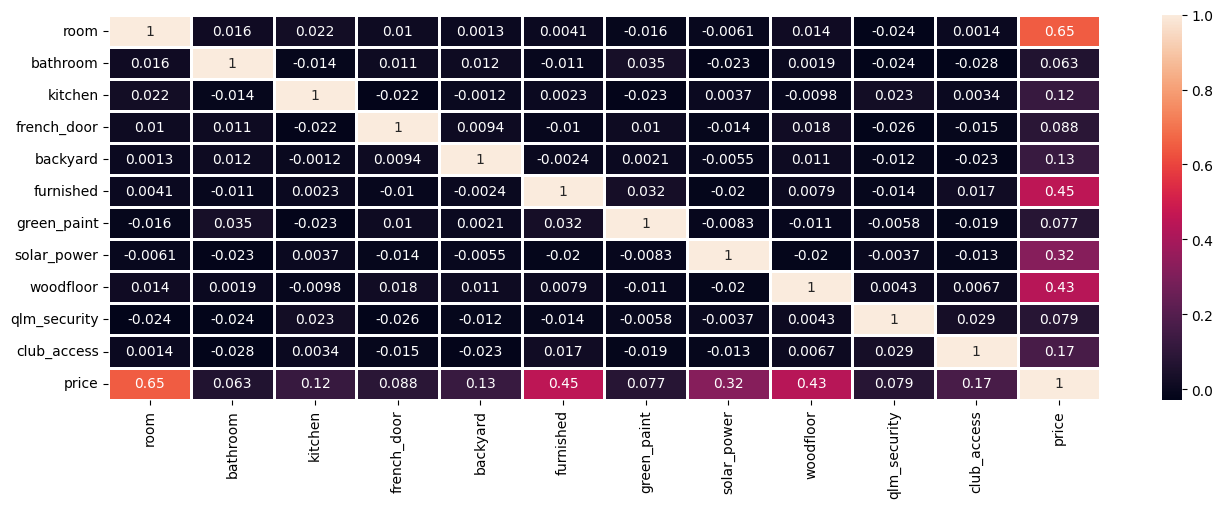

In [15]:
#Manipulating the size of the figure
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))

#Correlation analysis between the features
sns.heatmap(trained_data.corr(), annot=True,linewidths=1
            )

In [16]:

#Trained data columns
trained_data.columns

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object')

 **MULTIPLE** **LINEAR** **REGRESSION** **MODEL**

In [17]:
X=trained_data[['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access']]

In [18]:
y=trained_data['price']

y

0       6835
1       9005
2       9005
3       5105
4       9105
        ... 
2995    4825
2996    6755
2997    7565
2998    9135
2999    8955
Name: price, Length: 3000, dtype: int64

In [19]:
#assigning variables to the train and test data to be fitted into the multiple regression model

X_train,y_train,X_test,y_test=X,y,test_data[['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access']],test_data['price']
y_test



0       5068
1       7658
2      11318
3       8858
4      11178
       ...  
994    10088
995     9788
996     9388
997     8528
998     6118
Name: price, Length: 999, dtype: int64

In [20]:
# Fit a multiple linear regression model
LR=LinearRegression()

In [21]:
LR.fit(X_train,y_train)


# Make predictions on test data
y_pred = LR.predict(X_test)


#Regression model Coefficient
Coefficie = pd.DataFrame(LR.coef_.transpose(),X.columns,columns=['Coefficient'])

Coefficie.transpose()
Coefficie


,Coefficient
room,1000.0
bathroom,300.0
kitchen,500.0
french_door,240.0
backyard,560.0
furnished,2000.0
green_paint,370.0
solar_power,1530.0
woodfloor,1890.0
qlm_security,440.0


In [22]:


#fitting the train data into the regression model
LR.fit(X_train,y_train)


# Make predictions on test data
y_pred = LR.predict(X_test)

#printing the intercept
print("Intercept: \n",LR.intercept_)




#Print the performance metrics
print('R-squared: {:.3f}'.format(r2_score(y_test, y_pred)))
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.3f}'.format(sqrt(mean_squared_error(y_test, y_pred))))
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))




Intercept: 
 195.00000000000182
R-squared: 1.000
MSE: 169.000
RMSE: 13.000
MAE: 13.000


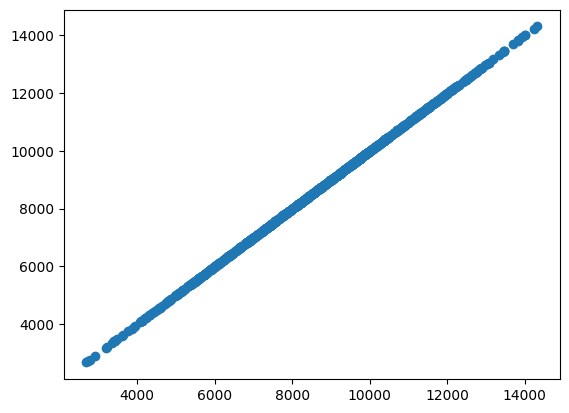

In [23]:
plt.scatter(y_test,y_pred)

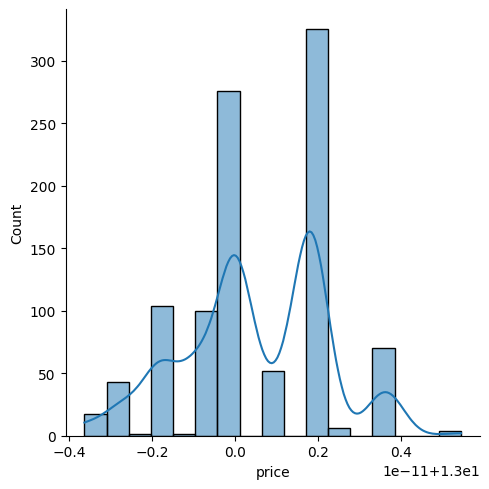

In [24]:
#Display the error distribution


error = y_test - y_pred
sns.displot(error, kde=True)

In [25]:
#converting the predicted price to a dataframe

Price_predictions=pd.DataFrame(y_pred)

Price_predictions

,0
0,5055.0
1,7645.0
2,11305.0
3,8845.0
4,11165.0
...,...
994,10075.0
995,9775.0
996,9375.0
997,8515.0


In [26]:
from pandas.core.internals import concat
TESTDATAPREDICTIONS = pd.concat([test_data,round(Price_predictions)], axis = 1)
TESTDATAPREDICTIONS.columns

TESTDATAPREDICTIONS.rename(columns={0: "Predicted_price"}, inplace=True)

TESTDATAPREDICTIONS
#student_df_1.rename(columns={"id": "ID"}, inplace=True)

#student_df_1

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,Predicted_price
0,1,1,1,3,0,0,1,1,0,1,0,5068,5055.0
1,5,1,1,2,0,0,0,0,0,1,1,7658,7645.0
2,5,1,1,3,0,0,0,1,1,1,1,11318,11305.0
3,4,2,2,1,0,1,1,0,0,1,0,8858,8845.0
4,5,2,1,1,0,1,1,1,0,0,1,11178,11165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,10075.0
995,5,1,2,3,1,1,0,0,0,0,0,9788,9775.0
996,3,2,2,1,0,1,1,1,0,1,0,9388,9375.0
997,3,2,1,1,1,0,0,1,1,0,0,8528,8515.0


**APPLICATION OF RANDOM FOREST**

In [27]:
#PREDICTION ON THE SPLITTED DATA
from sklearn.ensemble import RandomForestRegressor
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestRegressor(random_state=60)
random_forest.fit(X_train2, y_train2)
y_pred2 = random_forest.predict(X_test2)
print('Test R2 score:', r2_score(y_test2, y_pred2))
print('Test MSE score:', mean_squared_error(y_test2, y_pred2))
print('RMSE: {:.3f}'.format(sqrt(mean_squared_error(y_test2, y_pred2))))
print('MAE: {:.3f}'.format(mean_absolute_error(y_test2, y_pred2)))



Test R2 score: 0.9836586867542125
Test MSE score: 72259.34516666665
RMSE: 268.811
MAE: 212.945


In [28]:
y_pred3 = random_forest.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred3))
print('Test MSE score:', mean_squared_error(y_test, y_pred3))
print('RMSE: {:.3f}'.format(sqrt(mean_squared_error(y_test, y_pred3))))
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred3)))


Test R2 score: 0.9872579303733827
Test MSE score: 62616.452112112114
RMSE: 250.233
MAE: 191.431


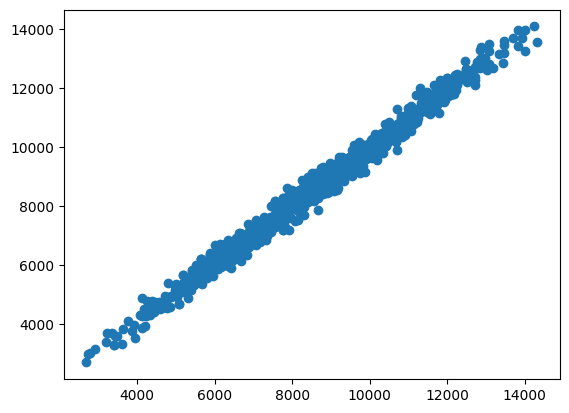

In [29]:
plt.scatter(y_test,y_pred3)

**Feature Importance**

In [30]:
feature_importances = pd.DataFrame(random_forest.feature_importances_, index=X_train2.columns,columns=['Importance']).sort_values('Importance',ascending= False)
feature_importances


,Importance
room,0.432312
furnished,0.200806
woodfloor,0.174689
solar_power,0.113373
club_access,0.025788
backyard,0.014117
kitchen,0.011039
french_door,0.008774
qlm_security,0.007946
green_paint,0.006204


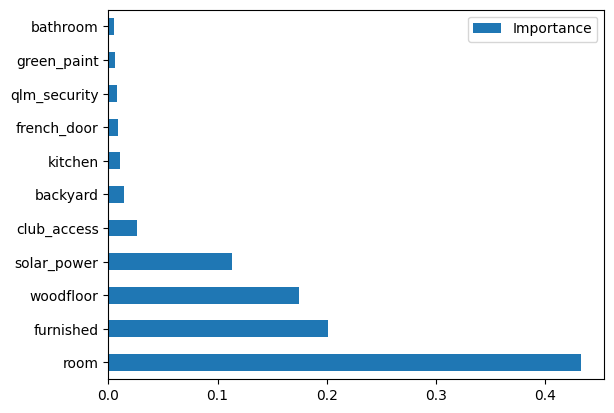

In [31]:
feature_importances.plot(kind='barh')
plt.show()

**OUT-OF-BAG (OOB) Feature Importance**

OOB R2 score: 0.9867209059228307
OOB MSE score: 66793.73503311104
              Importance
room            0.434263
furnished       0.200671
woodfloor       0.172919
solar_power     0.113306
club_access     0.025448
backyard        0.014297
kitchen         0.011289
french_door     0.008799
qlm_security    0.007848
green_paint     0.006188
bathroom        0.004971


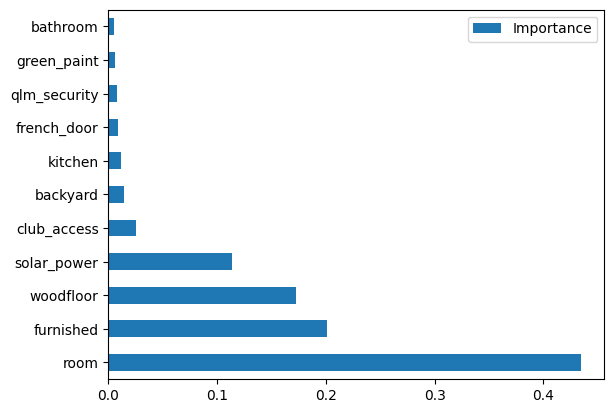

In [32]:
# RF Model
randomforestoob = RandomForestRegressor(random_state=42, oob_score=True)

# RF model fit with OOB
randomforestoob.fit(X_train2, y_train2)

# Evaluate OOB score
print('OOB R2 score:', randomforestoob.oob_score_)
print('OOB MSE score:', mean_squared_error(y_train2, randomforestoob.oob_prediction_))
#pd.DataFrame(random_forest.feature_importances_, index=X_train2.columns,columns=['Importance']).sort_values('Importance',ascending= False)
# Obtain feature importances and plot them
importancesoob = pd.DataFrame(randomforestoob.feature_importances_,index=X_train2.columns,columns=['Importance']).sort_values('Importance',ascending= False)
print(importancesoob)
importancesoob.plot(kind='barh')
plt.show()

**PRICE PREDICTIONS WITH MULTIPLE LINEAR REGRESSION VS RANDOM FOREST**

In [33]:
#TESTDATAPREDICTIONS
Randomforestpricepridiction=pd.DataFrame(y_pred3)
Randomforestpricepridiction
TESTDATAPREDICTIONS



ComparisonMLR_RF = pd.concat([TESTDATAPREDICTIONS,round(Randomforestpricepridiction)], axis = 1)
#TESTDATAPREDICTIONS.columns

ComparisonMLR_RF.rename(columns={0: "RF_PRICEPREDICT","Predicted_price": "MLR_PRICEPREDICT"}, inplace=True)

ComparisonMLR_RF

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,MLR_PRICEPREDICT,RF_PRICEPREDICT
0,1,1,1,3,0,0,1,1,0,1,0,5068,5055.0,5250.0
1,5,1,1,2,0,0,0,0,0,1,1,7658,7645.0,7696.0
2,5,1,1,3,0,0,0,1,1,1,1,11318,11305.0,11473.0
3,4,2,2,1,0,1,1,0,0,1,0,8858,8845.0,8767.0
4,5,2,1,1,0,1,1,1,0,0,1,11178,11165.0,11084.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,10075.0,9916.0
995,5,1,2,3,1,1,0,0,0,0,0,9788,9775.0,9810.0
996,3,2,2,1,0,1,1,1,0,1,0,9388,9375.0,9003.0
997,3,2,1,1,1,0,0,1,1,0,0,8528,8515.0,8596.0
